# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

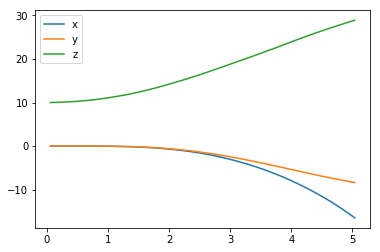

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

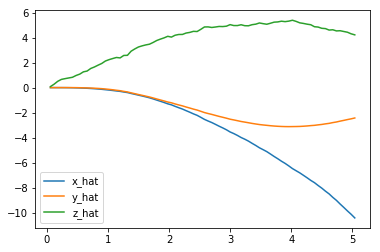

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

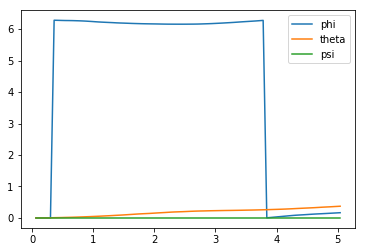

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

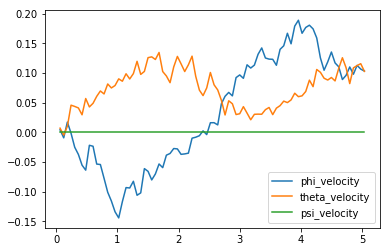

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

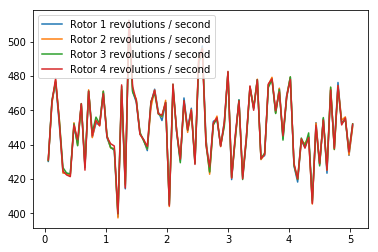

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-16.50676596  -8.3737233   28.89735808   0.16545708   0.37152787
   0.        ]
[-10.4267922   -2.43069689   4.22060748]
[0.10313102 0.10261467 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1
target_pos = np.array([0., 0., 50.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =    1, score =   2.478 (best =   2.478), noise_scale = 0.05

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
from agents.agent import DDPG
import numpy as np

num_episodes = 500
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = DDPG(task)

stats = {"episode":[], "score":[], "final_height": []}

for i_episode in range(num_episodes):
    state = agent.reset_episode()
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")
            break
    stats["episode"].append(i_episode)
    stats["score"].append(agent.score)
    stats["final_height"].append(task.get_height())
    #agent.acceptable_episode()
    #task.print_position()
    agent.reset_score()
    sys.stdout.flush()

Using TensorFlow backend.


Episode =  499, score = 161.512 (best = 261.177)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

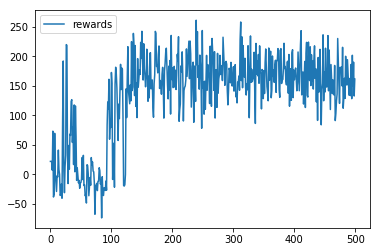

In [11]:
## TODO: Plot the rewards.
plt.plot(stats['episode'][:], stats['score'][:], label='rewards')
plt.legend()
_ = plt.ylim()

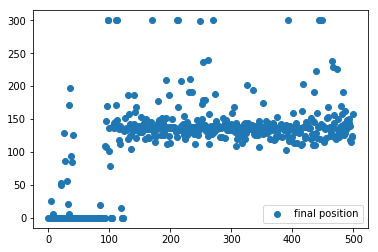

In [12]:
plt.scatter(stats['episode'][:], stats['final_height'][:], label='final position')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
<br>
Describe the task that you specified in `task.py`.  How did you design the reward function?
The task was that the agent could learn how to take off and achieve a considerable height. For this reason, the target point was the vector [0, 0, 100]. 

To accomplish this task, I considered the distance between the quadcopter and the floor, in other words the z variable. If the value of the z variable was bellow the target point the reward would be defined by a negative quadratic function.
![title](img/plot1.png)
The domain would be the values between 0 and 10, this by dividing the actual height by 10. The final reward was divided by 100 to get values between 0 and 1. 
In case the height of the quadcopter was above the target point I used the next function.
![title](img/plot2.png)
The independent variable would be obtained by subtracting the actual height from the target height. Any height bigger than 200 hundred would obtain a reward of 0. 

Given this condition the quadcopter will learn to takeoff in the first 100 episodes. The only problem was that it could fly far way from the origin point. To penalize this, I subtracted from the reward the distance between the x and y position of the quadcopter and the origin. Finally, if the height was 0 the reward would be settled to -0.8. In summary the reward will be proportional to the height until it surpasses the target point and the penalty would be provided by the distance between the origin and (x,y) coordinates.

I also followed one advice found in the Udacity (Is there something major I'm missing regarding the Quadcopter project?) forum and added a constant to the reward of the last episode if the agent finished inside a good radius of the target point and penalized it if it crashed. This was implemented in an evaluation function in the agent.py file.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I decided to use the DDPG implementation provided in the description of the project. I read the research article and I understood that DDPG is appropriate for problems were the action space is continuous. I know that NFQCA algorithm could also be used to solve these problems, but I didn’t have the time to implement it. DDPG worked well until I figured out an appropriate task and reward. 

I decided to maintain most of the hyperparameter values already provided by the implementation, this because they are the ones that worked with the algorithm according to the research article.  “CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING”. However, I changed tau to be 0.001.
The final Hyperparameters values were:

* Noise process
    * Mu = 0
    * Theta = 0.15
    * Sigma = 0.2
* Replay memory
    * Buffer size = 1000000
    * Batch size = 64
* Algorithm
    * Gamma = 0.99
    * Tau = 0.001
    
DDPG requires two neural networks the Actor and the Critic and for each network a target network with the same parameters. 

Actor

For the actor I used two neural networks the first layer has 400 units and the second layer has 300 units, each with a relu activation function. After this layer I added a batch normalization layer, this with the purpose to normalize the input between the linear layers and the non-linear output layer. The final layer has 4 units and a tanh activation function. This network uses an Adam optimizer. 

References
https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

Critic

The critic network maps the state, actions to the Q-values. For this reason, states and actions layers are defined separately and later merged before the final layer. 

The state part of the network has two hidden layers, the first one has 400 units and the second layer has 300 units both have a relu activation function. The action part of the network has the same architecture. The final layer has a relu activation function. The optimizer chosen for this network is Adam.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The rewards plot shows that for the first 100 episodes it is difficult for the agent to achieve a considerable height. Comparing this plot with the complementary “height plot”, the agent finished these episodes in the floor.  There are some points during the first 30 episodes were the agent receives a good reward by flying higher. These episodes are the ones that teach the agent that the reward is proportional to the height it achieves. 

Around the first 110 episodes the agent started to obtain better rewards by flying higher. It could be said that this was the “aha” moment. From this episode onwards, the agent achieved a consistent height between 100 and 150. The heights plot show that there were few instances were the agent flew very far from the target point of 100. Also, the density of episodes that ended bellow 150 increases after episodes 350. Approximately between episode 100 and 350 the agent explored with different heights then it started to exploit the rewards obtained by flying bellow 150.

The final performance of the agent started to converge around 150. For the agent it was difficult to learn to achieve the target height without flying a little far from the origin point. The rewards were affected by the penalty caused by the final distance between the origin and the x, y coordinates. I tried with different functions to penalize the agent without ignoring the height target. For example, I tried with a two-dimensional gaussian function that could model this, but it ended penalizing the agent very hard and it never flew higher than 10. 


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

For me the hardest part of the project was defining the reward. I tried with several functions but most of them failed because they didn’t capture the correct behavior I was expecting. Also, I found that functions that didn’t normalize the output between 0 and 1 affected how the agent learned. Another problem that I found with these functions was that a little change in one of the constants of the function would produce a very different result. The strategy that at the end worked for me was printing the positions of the rewards and the penalties then observing which actions were rewarded as I expected and which actions were penalized. Viewing this data allowed by to figure out better functions that could model this behavior. 

As I wrote before I found that it was difficult for the quadcopter to takeoff in a straight manner like an elevator. This caused in some degree by the height it had to achieve, with smaller heights it could be easier for the agent to take off without flying far from the origin point. 

This project was challenging because it required research of the correct algorithm, in this case DDPG, designing a reward function, and tuning the hyperparameters of the algorithm and the neural networks. However, I really enjoyed the whole process. 
